## Importing Libaries

In [2]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

## Instantiating mountain car Environment 

In [3]:
env = gym.make('MountainCar-v0')

## Creating Q_table based on size of question (discretize)

In [4]:
states_shape = (env.observation_space.high - env.observation_space.low) * [10, 100]
states_shape = np.round(states_shape, 0).astype(int) + 1

Q = np.zeros((states_shape[0], states_shape[1], env.action_space.n))

## Define constants of problem

In [5]:
EPSILON = 0.15
LEARNING_RATE = 0.2
DISCOUNT = 0.9
EPISODES = 5000

## Define variables to store rewards in each episode

In [6]:
sum_rewards = []
avg_rewards = []

## Iterating over episodes

In [7]:
for i in range(EPISODES):

    done = False

    episode_rewards = []
    
    # getting state of car and discretize it
    curr_state = env.reset()
    curr_state_index = (curr_state - env.observation_space.low) * [10, 100]
    curr_state_index = np.round(curr_state_index, 0).astype(int)

    # while time is not ended or the car doesn't reach destination, this loop will iterate
    while not done:

        # this two lines will visualize mountain car in last steps
        if i > EPISODES * .999:
            env.render()
            
        # randomized choosing action between expoloring or exploiting
        if random.uniform(0, 1) < EPSILON:
            # choose action randomly
            action = random.randint(0, env.action_space.n - 1)
        else:
            # choose action with maximum reward
            action = np.argmax(Q[curr_state_index[0], curr_state_index[1]]) 

        # apply next action by step() function and getting next state of car and discretize it
        next_state, reward, done, info = env.step(action)
        next_state_index = (next_state - env.observation_space.low) * [10, 100]
        next_state_index = np.round(next_state_index, 0).astype(int)

        # check if car reached destination
        if done and next_state[0] >= 0.5:
            # this section means car reached destination, so reward will be added to this action
            Q[curr_state_index[0], curr_state_index[1], action] = reward
        else:
            # this section means car doesn't reach destination, so learning will happen here
            # the formula is shown in picture below
            Q[curr_state_index[0], curr_state_index[1], action] += LEARNING_RATE * (reward + DISCOUNT * np.max(Q[next_state_index[0], next_state_index[1]]) - Q[curr_state_index[0], curr_state_index[1], action]) 

        # updating current state
        curr_state_index = next_state_index

        # stroring each episode reward
        episode_rewards.append(reward)

    # decreasing Epislon linearly. By this way actions will be chosen more exploiting than exploring
    EPSILON -= EPSILON / EPISODES

    sum_rewards.append(np.sum(episode_rewards))
    avg_rewards.append(np.mean(sum_rewards))

    # printing rewards of each episode (every 100 episodes)
    if ( i + 1 ) % 100 == 0:
        print(str(i + 1) + ': ' + str(np.sum(episode_rewards)))

100: -200.0
200: -200.0
300: -200.0
400: -200.0
500: -200.0
600: -200.0
700: -200.0
800: -200.0
900: -200.0
1000: -200.0
1100: -196.0
1200: -200.0
1300: -200.0
1400: -200.0
1500: -166.0
1600: -200.0
1700: -200.0
1800: -200.0
1900: -200.0
2000: -158.0
2100: -161.0
2200: -200.0
2300: -200.0
2400: -159.0
2500: -200.0
2600: -200.0
2700: -200.0
2800: -182.0
2900: -200.0
3000: -200.0
3100: -200.0
3200: -164.0
3300: -200.0
3400: -156.0
3500: -190.0
3600: -163.0
3700: -200.0
3800: -200.0
3900: -200.0
4000: -197.0
4100: -200.0
4200: -200.0
4300: -200.0
4400: -178.0
4500: -150.0
4600: -200.0
4700: -157.0
4800: -200.0
4900: -200.0
5000: -200.0


<img src="learn.jpg">

## Closing mountain car environment 

In [8]:
env.close()

## Showing plot of rewards

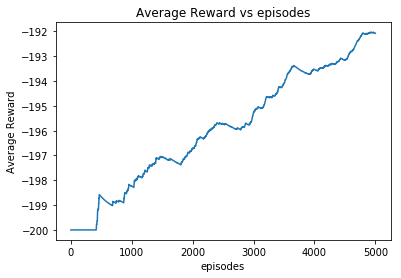

In [9]:
plt.plot(range(EPISODES), avg_rewards)
plt.xlabel('episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs episodes')
plt.show()     
plt.close() 